# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 3 :  Data Exploration and Visualization

## Reading: 

## Homework 1

### Using `assert`

In [3]:
assert 1 == 1

In [4]:
assert 1 == 0

AssertionError: 

### Pivot Tables

In [ ]:
- pivot for dataset transformation

In [ ]:
- pivot_table for summarization

#### `pivot` for dataset transformation

In [29]:
import pandas as pd

A = [[1, 'rain_fall', .2],
     [1, 'temperature', 81],
     [2, 'rain_fall', 0]]

df = pd.DataFrame(A, columns=['site','measure','reading'])
df.head()

,site,measure,reading
0,1,rain_fall,0.2
1,1,temperature,81.0
2,2,rain_fall,0.0


In [30]:
df.pivot(index='site',columns='measure',values='reading')

measure,rain_fall,temperature
site,,
1,0.2,81.0
2,0.0,NaN


#### `pivot_table` for summarization

In [32]:
A = [[1, 'Manhattan', 'afternoon', 83],
     [1, 'Manhattan', 'morning', 79],
     [2, 'Manhattan', 'morning', 80],
     [3, 'Brooklyn', 'afternoon', 80]]

df = pd.DataFrame(A, columns=['site','borough','time_of_day','temp'])
df.head()

,site,borough,time_of_day,temp
0,1,Manhattan,afternoon,83
1,1,Manhattan,morning,79
2,2,Manhattan,morning,80
3,3,Brooklyn,afternoon,80


In [33]:
df.pivot_table('temp',index='borough',columns='time_of_day')

time_of_day,afternoon,morning
borough,,
Brooklyn,80.0,NaN
Manhattan,83.0,79.5


### Join Example

In [54]:
pop = pd.read_csv('../data/state-population.csv')
abbrevs = pd.read_csv('../data/state-abbrevs.csv')

In [55]:
print(pop.head())
print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [56]:
pd.merge(pop, abbrevs, left_on='state/region', right_on='abbreviation').head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [58]:
#using join

abbrevs.set_index('abbreviation',inplace=True)

In [62]:
pop.join(abbrevs, on='state/region', how='inner').head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


## Example Data: NYC Taxi data

### Setup

In [64]:
import pandas as pd
import numpy as np

np.random.seed(123)

### Reading in data

In [65]:
df = pd.read_csv('../data/yellow_tripdata_2017-01.csv',parse_dates=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9710124 entries, 0 to 9710123
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [72]:
df = df.iloc[np.random.permutation(len(df))[:100000],:]

df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

df = df[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','fare_amount','tip_amount']]

In [73]:
df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3834051 to 2050761
Data columns (total 6 columns):
tpep_pickup_datetime     100000 non-null datetime64[ns]
tpep_dropoff_datetime    100000 non-null datetime64[ns]
trip_distance            100000 non-null float64
fare_amount              100000 non-null float64
tip_amount               100000 non-null float64
trip_duration            100000 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 7.8 MB


## Single variable statistics & Visualizations

### Exploring Location

$\Large \bar{x} = \frac{1}{n} \sum x_i$

In [83]:
df.trip_duration.mean()

889.48346000000004

In [84]:
df.trip_duration.median()

621.0

In [85]:
from scipy.stats import trim_mean
print(trim_mean(df.trip_duration, proportiontocut=.1))

689.05175


In [86]:
print(trim_mean(df.trip_duration, proportiontocut=.2))

653.57085


### Exploring Variability

$\Large s^2 = \frac{\sum(x-\bar{x})^2}{n-1}$

$\Large s = \sqrt{s^2}$

In [88]:
df.trip_duration.std()

3010.1772285425154

### Quantiles or percentiles

In [108]:
print(np.percentile(df.trip_duration, 75))

1004.0


In [95]:
df.trip_duration.describe()

count    100000.000000
mean        889.483460
std        3010.177229
min           0.000000
25%         374.000000
50%         621.000000
75%        1004.000000
max       86369.000000
Name: trip_duration, dtype: float64

In [150]:
print(np.percentile(df.trip_duration, 99))

3231.03


In [100]:
print(df.trip_duration.max())
print(86400 / 60 / 60)

86369
24.0


### Plotting with Matplotlib

In [91]:
import matplotlib.pyplot as plt

# to avoid having to do plt.show()
%matplotlib inline

### Histograms

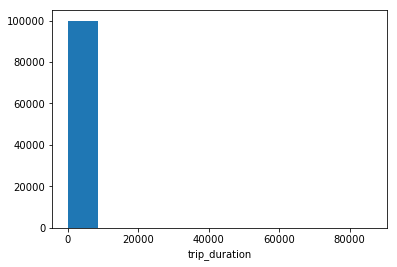

In [131]:
_ = plt.hist(df.trip_duration)
_ = plt.xlabel('trip_duration')

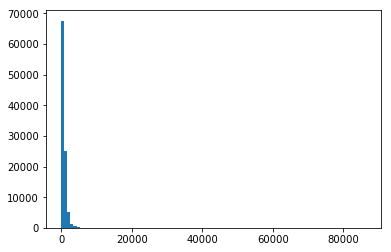

In [111]:
_ = plt.hist(df.trip_duration, bins=100)

### Plotting with Pandas

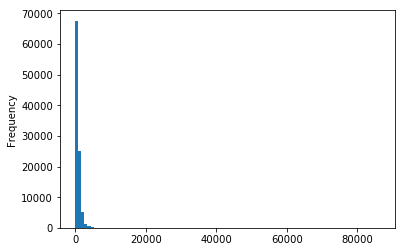

In [112]:
_ = df.trip_duration.plot.hist(bins=100)

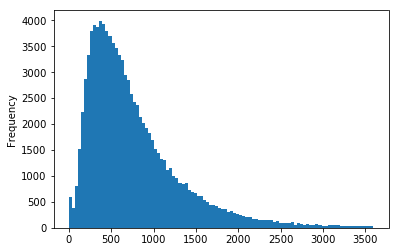

In [120]:
_ = df[df.trip_duration < 3600].trip_duration.plot.hist(bins=100)

### Plotting with Seaborn

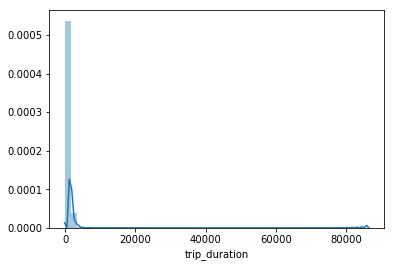

In [115]:
_ = sns.distplot(df.trip_duration)

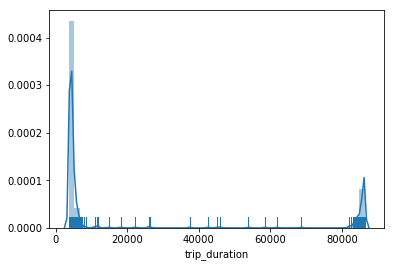

In [119]:
_ = sns.distplot(df[df.trip_duration > 3600].trip_duration, rug=True)

### Box Plots

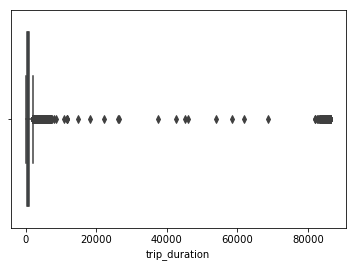

In [121]:
sns.boxplot(df.trip_duration)

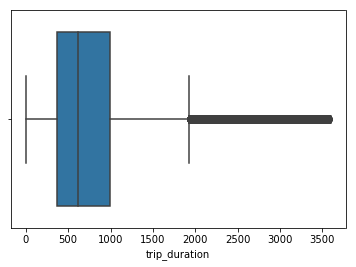

In [122]:
sns.boxplot(df[df.trip_duration < 3600].trip_duration)

In [123]:
#Inter Quartile Range
perc_25 = np.percentile(df[df.trip_duration < 3600].trip_duration, 25)
perc_75 = np.percentile(df[df.trip_duration < 3600].trip_duration, 75)
IQR = perc_75-perc_25
print(IQR)

620.0


In [125]:
print(perc_75 + 1.5*IQR)
print(perc_25 - 1.5*IQR)

1923.0
-557.0


In [126]:
1920 / 60

32.0

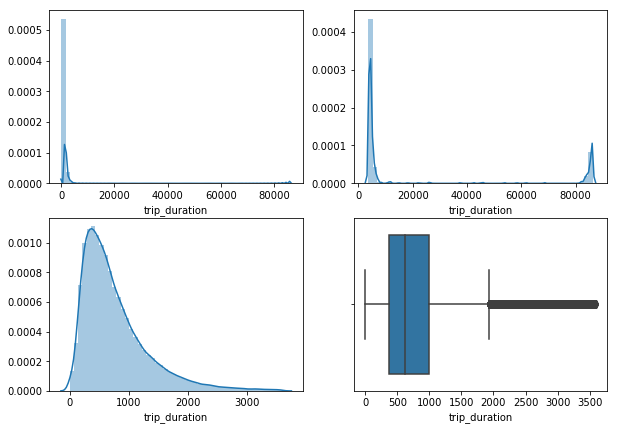

In [148]:
fig, ax = plt.subplots(2,2, figsize=(10,7))

_ = sns.distplot(df.trip_duration, ax=ax[0][0])
_ = sns.distplot(df[df.trip_duration > 3600].trip_duration, ax=ax[0][1])
_ = sns.distplot(df[df.trip_duration <= 3600].trip_duration, ax=ax[1][0])
_ = sns.boxplot(df[df.trip_duration <= 3600].trip_duration, ax=ax[1][1])

## Analyzing and Plotting Relationships

### Scatter plots for real values

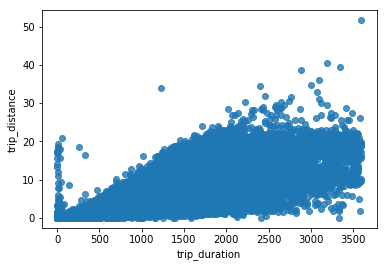

In [158]:
lt_hour = df.trip_duration < 3600
_ = plt.scatter(df[lt_hour].trip_duration,
                df[lt_hour].trip_distance,
                alpha=0.8
               )
_ = plt.xlabel('trip_duration')
_ = plt.ylabel('trip_distance')

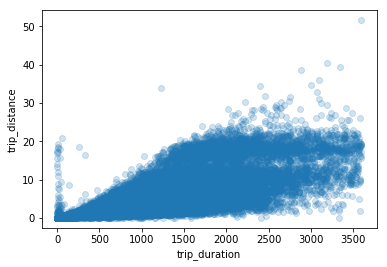

In [157]:
_ = sns.regplot(x='trip_duration',
                y='trip_distance',
                data=df[lt_hour], 
                scatter_kws={'alpha':0.2},
                fit_reg=False
               )

### Correlation

$\Large r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_xs_y}$

In [162]:
from scipy.stats import pearsonr
r,p = pearsonr(df[lt_hour].trip_duration, df[lt_hour].trip_distance)
print(r)

0.783160576371


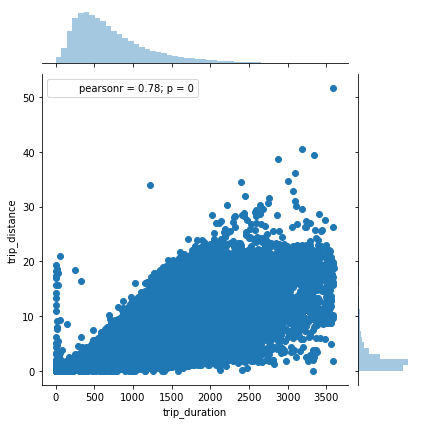

In [166]:
_= sns.jointplot(x='trip_duration',
                 y='trip_distance',
                 data=df[lt_hour],
                )

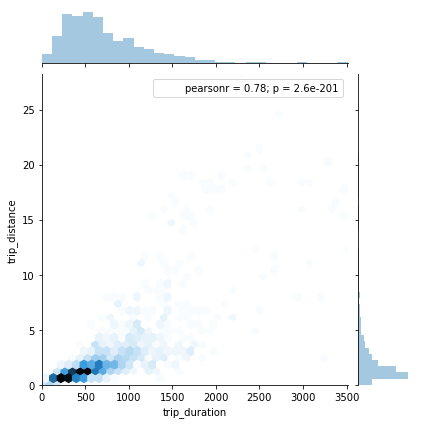

In [191]:
_= sns.jointplot(x='trip_duration',
                 y='trip_distance',
                 data=df[lt_hour & (df.trip_distance < 30)].iloc[:1000],
                 kind='hex'
                )

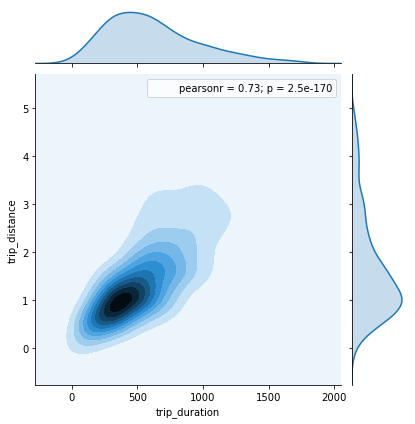

In [197]:
_= sns.jointplot(x='trip_duration',
                 y='trip_distance',
                 data=df[(df.trip_duration < 1800) & (df.trip_distance < 5)].iloc[:1000],
                 kind='kde'
                )

### Comparing with categorical variables

In [168]:
df['day_of_week'] = df.tpep_pickup_datetime.dt.dayofweek

In [171]:
# 0 = Monday, 6 = Sunday
df[lt_hour].day_of_week.value_counts()

1    15855
6    15205
4    14262
0    13968
5    13696
3    13399
2    12942
Name: day_of_week, dtype: int64

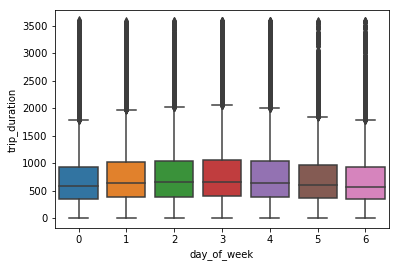

In [174]:
sns.boxplot(x='day_of_week',y='trip_duration',data=df[lt_hour])

In [176]:
df[lt_hour].groupby('day_of_week').trip_duration.mean()

day_of_week
0    725.234393
1    788.351056
2    798.127646
3    809.801926
4    793.377997
5    731.508835
6    713.086682
Name: trip_duration, dtype: float64

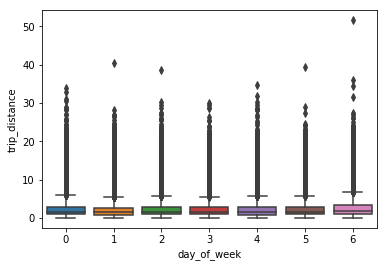

In [177]:
sns.boxplot(x='day_of_week',y='trip_distance',data=df[lt_hour])

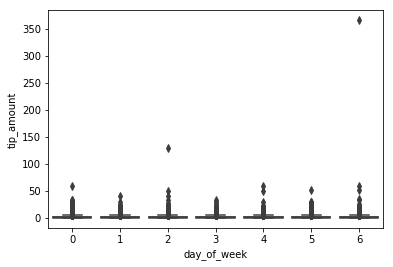

In [178]:
sns.boxplot(x='day_of_week',y='tip_amount',data=df[lt_hour])

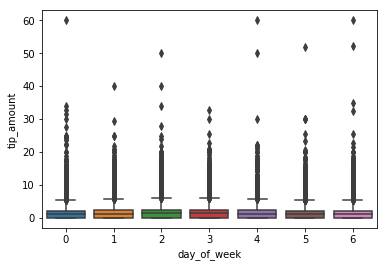

In [179]:
sns.boxplot(x='day_of_week',y='tip_amount',data=df[lt_hour & (df.tip_amount < 100)])

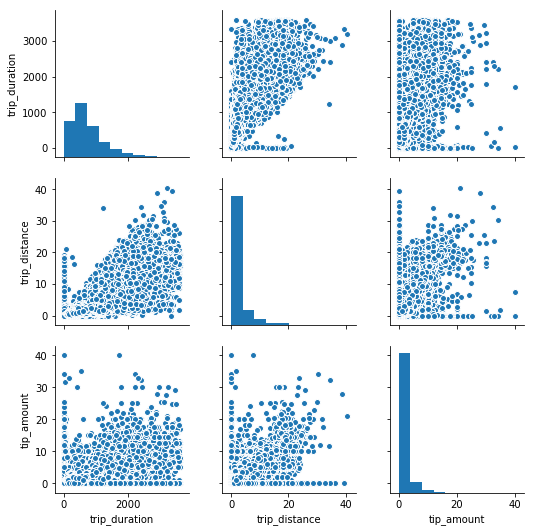

In [198]:
sns.pairplot(df.loc[lt_hour & (df.tip_amount < 50),['trip_duration','trip_distance','tip_amount']])